Survey from https://osf.io/vyr5f/

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!git clone https://github.com/ankitgin/OnlineGamingAnxietyAnalysis.git
path = '/content/OnlineGamingAnxietyAnalysis/dataset/GamingStudy_data.csv'

fatal: destination path 'OnlineGamingAnxietyAnalysis' already exists and is not an empty directory.


In [ ]:
# my_filepath = "/content/drive/MyDrive/Fall 2021/Data Mining/Project/GamingStudy_data.csv"
my_data = pd.read_csv(path, encoding = "ISO-8859-1", index_col='S. No.')
orig_data = my_data.copy()


In [ ]:
# my_filepath = '../input/online-gaming-anxiety-data/GamingStudy_data.csv'
# my_data = pd.read_csv(my_filepath, encoding = "ISO-8859-1", index_col='S. No.')

# Getting a feeling for the data

In [ ]:
pd.set_option('max_columns', None)
my_data.head()

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
S. No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


<h1> General data statistics </h1>

In [ ]:
#General statistics
my_data.describe()

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,SWL4,SWL5,Hours,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T
count,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.00000,13464.000000,13464.000000,13434.000000,0.0,13364.000000,13340.000000,13310.000000,13324.000000,13305.000000,13298.000000,13308.000000,13326.000000,13320.000000,13306.000000,13304.000000,13277.000000,13296.000000,13277.000000,13308.000000,13317.000000,13317.000000,13289.000000,13441.000000,13464.000000,13464.000000,13464.000000,12814.000000
mean,42054.841222,0.860963,0.673351,0.965761,0.724079,0.488042,0.911022,0.588755,3.720440,4.602050,4.34544,3.762032,3.358883,22.247357,NaN,11.233538,0.856897,1.210969,1.095392,1.682976,1.248985,1.348287,1.050503,1.405030,1.567338,0.917769,1.827446,0.892148,0.538827,1.252405,1.411054,0.620635,0.935962,2.027677,20.930407,5.211973,19.788844,19.848525
std,0.272948,0.926542,0.915724,0.982776,0.921971,0.837014,0.931168,0.894408,1.736264,1.696276,1.80943,1.818136,1.916319,70.284502,NaN,78.549209,0.907351,1.144054,1.164982,1.229730,1.221828,1.279251,1.221171,1.372777,1.383539,1.125849,1.488372,1.158235,0.944180,1.207463,1.349874,0.961853,1.180456,1.061842,3.300897,4.713267,7.229243,13.467493
min,42052.004370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000
25%,42054.716547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.00000,2.000000,2.000000,12.000000,NaN,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,2.000000,14.000000,9.000000
50%,42054.800675,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,5.000000,5.00000,4.000000,3.000000,20.000000,NaN,8.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,20.000000,4.000000,20.000000,17.000000
75%,42054.932112,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,6.00000,5.000000,5.000000,28.000000,NaN,15.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,22.000000,8.000000,26.000000,28.000000
max,42058.363750,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.00000,7.000000,7.000000,8000.000000,NaN,9001.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,63.000000,21.000000,35.000000,68.000000


<h1> Correlation Matrix </h1>

In [ ]:
my_data.corr()

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,SWL4,SWL5,Hours,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T
Timestamp,1.000000,-0.004000,-0.013507,-0.013820,-0.010515,-0.003289,-0.003688,-0.002251,0.005724,0.008078,0.010417,0.000244,0.000395,0.000376,NaN,-0.001725,-0.006333,-0.006150,-0.015730,-0.000559,-0.022711,-0.013589,-0.015534,-0.009034,-0.022019,-0.005092,-0.003948,-0.020256,-0.010976,-0.016380,-0.014024,-0.007185,-0.005354,-0.001401,-0.064874,-0.010089,0.006043,-0.018702
GAD1,-0.004000,1.000000,0.678952,0.603458,0.544008,0.347441,0.377897,0.506427,-0.254976,-0.234409,-0.341339,-0.219691,-0.223315,0.001919,NaN,-0.000656,0.202813,0.197258,0.311488,0.229759,0.290352,0.302325,0.225888,0.211199,0.216882,0.285557,0.167025,0.250275,0.289034,0.311755,0.272449,0.236578,0.275183,0.044111,-0.012684,0.793197,-0.316123,0.377417
GAD2,-0.013507,0.678952,1.000000,0.710580,0.568649,0.343386,0.355553,0.572555,-0.272713,-0.253878,-0.355746,-0.239601,-0.235539,0.004754,NaN,0.000992,0.211018,0.192639,0.281571,0.220771,0.293469,0.311178,0.236375,0.201607,0.222512,0.281603,0.169586,0.272260,0.297143,0.315957,0.287650,0.264704,0.275600,0.036055,-0.023494,0.827031,-0.336804,0.383752
GAD3,-0.013820,0.603458,0.710580,1.000000,0.549715,0.317391,0.365815,0.542117,-0.271796,-0.251629,-0.346261,-0.240053,-0.247073,0.002161,NaN,-0.002035,0.202182,0.208028,0.263787,0.203349,0.288991,0.303251,0.235135,0.195650,0.220007,0.255176,0.171445,0.269947,0.278738,0.321296,0.305276,0.241336,0.269262,0.042519,-0.058457,0.804238,-0.336853,0.373702
GAD4,-0.010515,0.544008,0.568649,0.549715,1.000000,0.425344,0.388510,0.467421,-0.261263,-0.261239,-0.345452,-0.228250,-0.225077,0.013749,NaN,0.008988,0.169391,0.176785,0.258597,0.195493,0.248994,0.253859,0.212155,0.200906,0.210332,0.237025,0.144908,0.231851,0.264259,0.279277,0.244934,0.226774,0.244839,0.042186,0.009359,0.768647,-0.327577,0.335865
GAD5,-0.003289,0.347441,0.343386,0.317391,0.425344,1.000000,0.313700,0.321594,-0.129054,-0.136861,-0.179298,-0.115741,-0.128238,0.004980,NaN,0.000905,0.105525,0.117496,0.163103,0.121793,0.152013,0.160692,0.129959,0.143015,0.129266,0.158362,0.086460,0.149186,0.184761,0.187072,0.150116,0.156486,0.164344,0.061379,-0.026822,0.584987,-0.171087,0.217657
GAD6,-0.003688,0.377897,0.355553,0.365815,0.388510,0.313700,1.000000,0.364888,-0.217258,-0.205396,-0.272451,-0.203709,-0.207632,0.028240,NaN,0.007039,0.130159,0.141478,0.176989,0.165720,0.228874,0.219587,0.193184,0.154400,0.162737,0.187133,0.130665,0.219970,0.205718,0.241621,0.236032,0.178800,0.193362,0.141047,-0.051095,0.618156,-0.274837,0.283239
GAD7,-0.002251,0.506427,0.572555,0.542117,0.467421,0.321594,0.364888,1.000000,-0.226236,-0.237372,-0.315966,-0.206762,-0.217500,0.009716,NaN,0.002415,0.200571,0.186406,0.248169,0.185339,0.260080,0.270370,0.216550,0.199509,0.205810,0.240184,0.161192,0.260930,0.294538,0.301077,0.267322,0.244640,0.258576,0.040073,-0.048464,0.734228,-0.298772,0.353922
SWL1,0.005724,-0.254976,-0.272713,-0.271796,-0.261263,-0.129054,-0.217258,-0.226236,1.000000,0.613430,0.698984,0.628955,0.507044,-0.018305,NaN,-0.007965,-0.087714,-0.106525,-0.194086,-0.184603,-0.144817,-0.222596,-0.128340,-0.167588,-0.208877,-0.169862,-0.183952,-0.140680,-0.153690,-0.217548,-0.190881,-0.158450,-0.150557,0.001991,-0.007879,-0.319659,0.851646,-0.256374
SWL2,0.008078,-0.234409,-0.253878,-0.251629,-0.261239,-0.136861,-0.205396,-0.237372,0.613430,1.000000,0.607883,0.511479,0.397777,-0.042376,NaN,-0.027562,-0.090408,-0.086147,-0.179255,-0.141416,-0.118861,-0.182171,-0.117400,-0.155787,-0.175935,-0.164537,-0.165570,-0.151007,-0.159046,-0.193133,-0.161659,-0.175970,-0.147916,0.002898,-0.031955,-0.308903,0.768197,-0.232244


<h1> Correlation Matrix visualtization </h1>

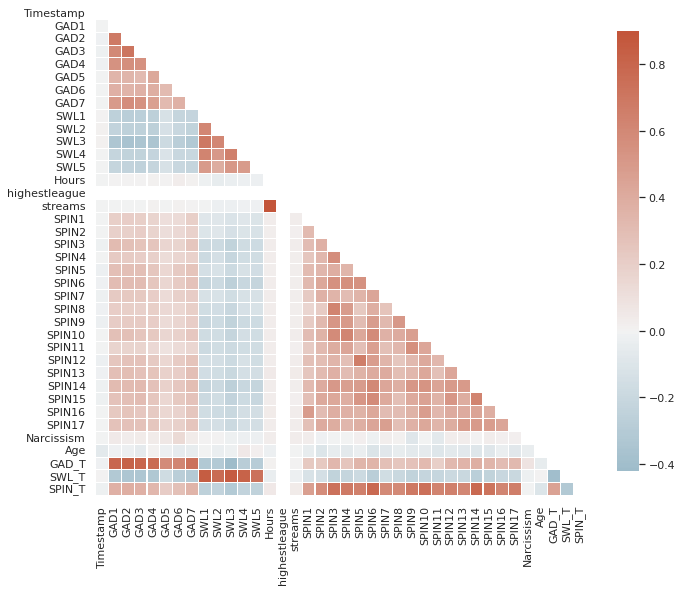

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
             #    columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = my_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=False, linewidths=.1, cbar_kws={"shrink": .9})

## Analysis on Age
### How distributed is our data in terms of age?

In [ ]:
print(my_data.Age.describe())

count    13464.000000
mean        20.930407
std          3.300897
min         18.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         63.000000
Name: Age, dtype: float64


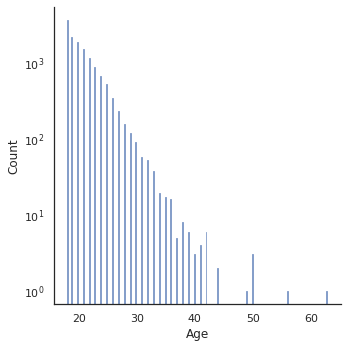

In [ ]:
sns.displot(data=my_data.Age, kde=False, log=True)
plt.show()

As expected we have a very young age-group with a mean of about 21. The youngest participants have the minimum required age to participate in the survey: 18, while the oldest participant has the age of 63.

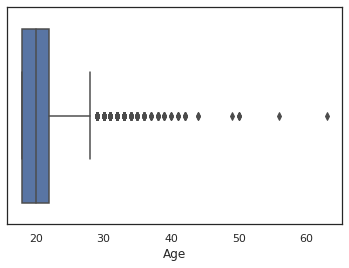

In [ ]:
sns.boxplot(x=my_data.Age)
plt.show()

#### Outliers
For later analysis it might be useful to identify and get rid of any outliers (by age). For that I calculate the upper age-limit:

In [ ]:
Quartile1 = my_data.Age.quantile(0.25)
Quartile3 = my_data.Age.quantile(0.75)
IQR = Quartile3 - Quartile1
upper_whisker = Quartile3 + 1.5*IQR
print(upper_whisker)
my_data_withoutOutliers = my_data.query('Age <= @upper_whisker')
print(f"Percentage of outliers in original Data: { (1 - my_data_withoutOutliers.size / my_data.size) * 100 }")

28.0
Percentage of outliers in original Data: 3.3273915626856776


Boxplot without the outliers:

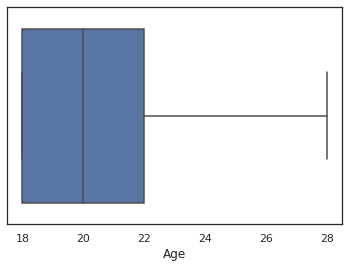

In [ ]:
sns.boxplot(x=my_data_withoutOutliers.Age)
plt.show()

### How distributed in terms of gender?

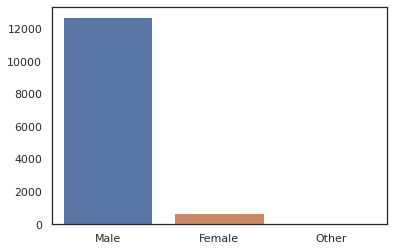

Percentage of male participants: 94.31818181818183%


In [ ]:
gender_counts = my_data.Gender.value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.show()

print(f"Percentage of male participants: {(gender_counts['Male']/my_data.shape[0] *100)}%")

### How distributed is our data in terms of location (residence)?

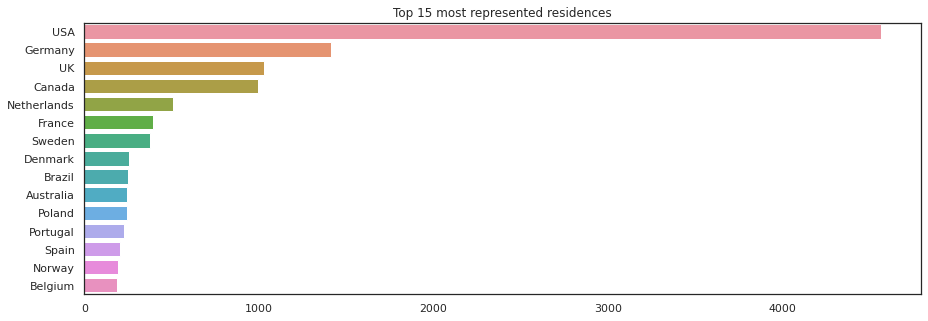

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=my_data.Residence.value_counts()[:15].values, y=my_data.Residence.value_counts()[:15].index)
plt.title('Top 15 most represented residences')
plt.show()

## Gamedata

### Amount of hours played per week

In [ ]:
my_data.Hours.sort_values(ascending=False)[:10]

S. No.
4046     8000.0
9944      420.0
9439      160.0
14056     150.0
8024      140.0
3267      140.0
4575      120.0
9247      120.0
653       120.0
4268      120.0
Name: Hours, dtype: float64

Seems like we have alot of very addicted people here with 8000 and 140+ hours per week played(These people really need some help). To get rid of most of these, lets assume that someone can only play around *16 hours per day* at most. That results to a *maximum of 112 hours per week*.

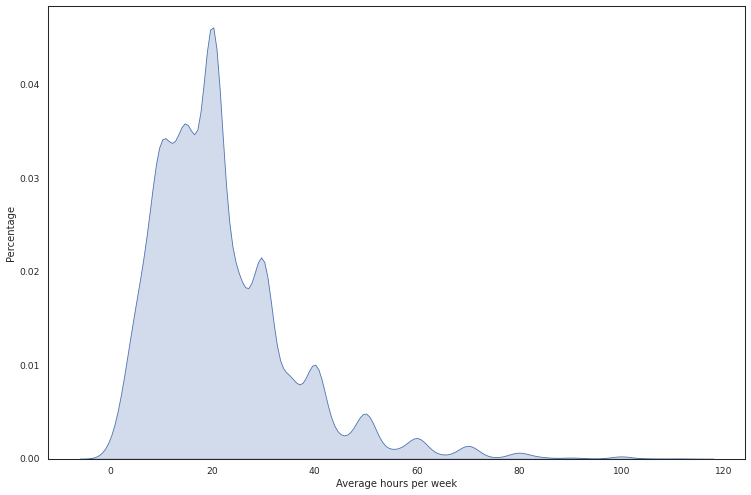

In [ ]:
max_hours_week = 16*7
legit_hour_df = my_data.query('Hours <= @max_hours_week')
plt.figure(figsize=(15, 10),dpi=60)
sns.kdeplot(data=legit_hour_df.Hours, shade=True)
plt.xlabel("Average hours per week")
plt.ylabel("Percentage")
plt.show()
# plt.savefig("hours_plot.png",dpi=250)

#### Lets see which country plays the most hours per week:

(Because we might have just one participant per country that just plays a lot, im going to limit the countries to those, where we at least have 100 participants):

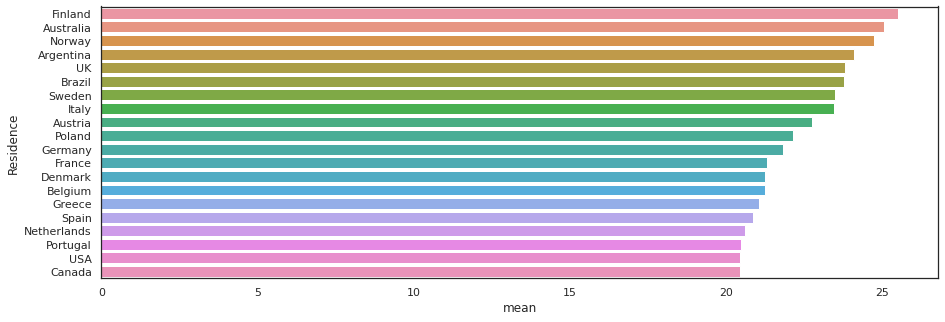

In [ ]:
residence_hours = legit_hour_df.groupby('Residence').Hours.agg(['mean', 'size']).query('Residence != "Unknown" & size >= 100')
residence_hours.sort_values(by=['mean'], ascending=[False], inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(y=residence_hours.index, x=residence_hours['mean'])
plt.show()

Lets also have a look, what kind of relation the age and hours played have:

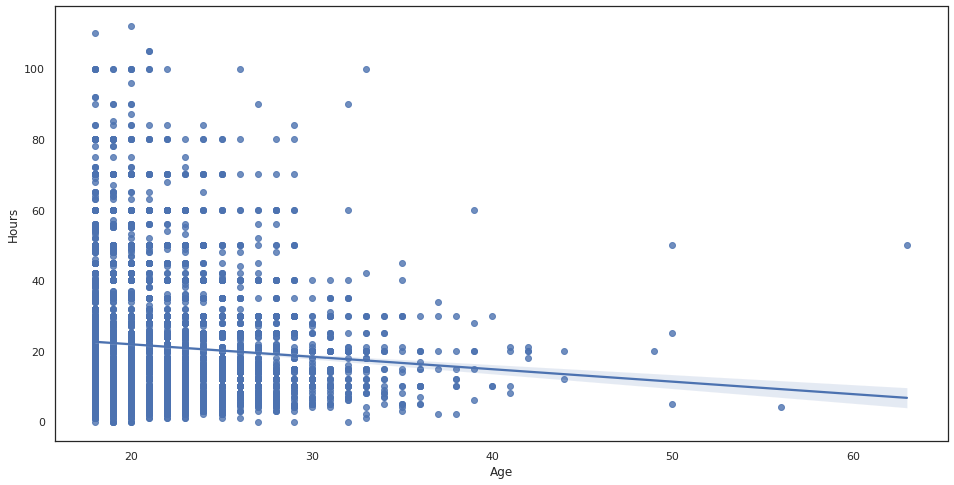

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x=legit_hour_df.Age, y=legit_hour_df.Hours)
plt.show()

Seems like the older the participant is, the less he plays.

### Playstyle
Possible solutions were:
* Multiplayer - online - with real life friends
* Multiplayer - online - with strangers
* Multiplayer - online - with online acquantances or teammates
* Singleplayer
* Multiplayer - offline (people in the same room)
* Other

I will ignore the 'other' answers and just look at the upper 5

In [ ]:
playstyle_choices = ['Multiplayer - online - with real life friends', 'Multiplayer - online - with strangers', 
                     'Multiplayer - online - with online acquaintances or teammates', 'Singleplayer', 'Multiplayer - offline (people in the same room)']
my_data['Playstyle_removed'] = my_data.Playstyle
my_data.loc[~my_data['Playstyle_removed'].isin(playstyle_choices), 'Playstyle_removed'] = 'Other'
my_data['Playstyle_removed'].value_counts()

Multiplayer - online - with real life friends                    5564
Multiplayer - online - with strangers                            4134
Multiplayer - online - with online acquaintances or teammates    2652
Singleplayer                                                      762
Other                                                             304
Multiplayer - offline (people in the same room)                    48
Name: Playstyle_removed, dtype: int64

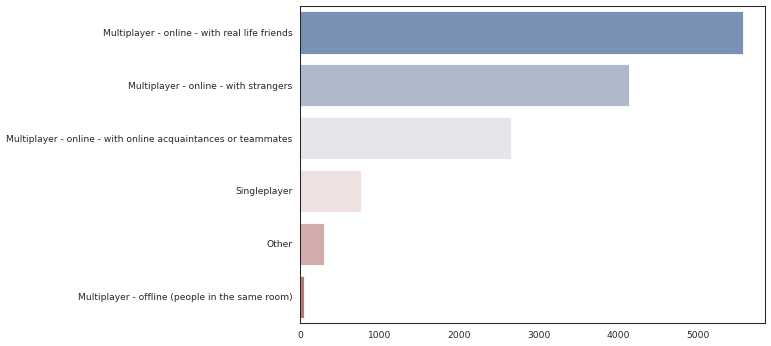

In [ ]:
plt.figure(figsize=(10, 7),dpi=60)
sns.barplot(x=my_data['Playstyle_removed'].value_counts().values, y=my_data['Playstyle_removed'].value_counts().index, palette="vlag")
# plt.savefig("hours_plot.png")
plt.show()

We previously looked at the relation between age and hours played per week. Lets take the Playstyle into account:

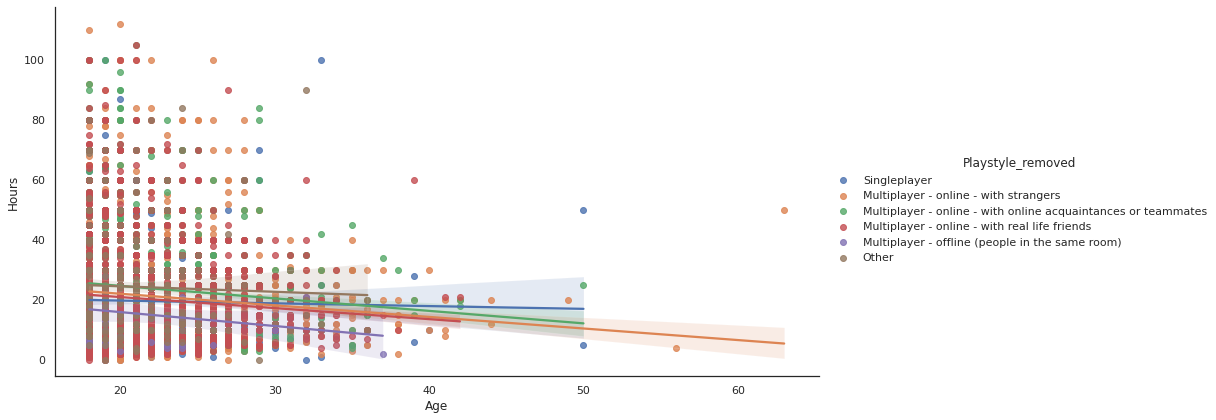

In [ ]:
sns.lmplot(x='Age', y='Hours', hue='Playstyle_removed', data=my_data.query('Hours <= @max_hours_week'), height=6, aspect=2)
plt.show()

While almost every Playstyle seems to have a similar slope, *Singleplayer* seems to be the exception. Participants who play Singleplayer, tend to - even when getting older - play the same amount per week.

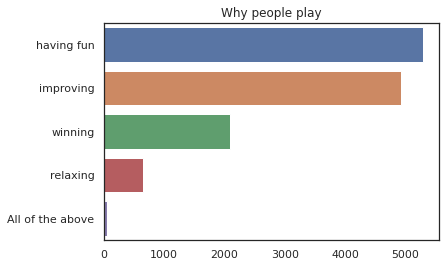

In [ ]:
my_data[my_data.whyplay == 'all of the above'] = 'All of the above'

sns.barplot(x=my_data.whyplay.value_counts()[:5].values, y=my_data.whyplay.value_counts()[:5].index)

plt.title('Why people play')
plt.show()

## 1. Questionnaire A

The participants had to rank themselfes on 7 statements about their psycological well-being:
<ul>
    <li>1. Feeling nervous, anxious, or on edge</li>
    <li>2. Not being able to stop or control worrying</li>
    <li>3. Worrying too much about different things</li>
    <li>4. Trouble relaxing</li>
    <li>5. Being so restless that it`s hard to sit still</li>
    <li>6. Becoming easily annoyed or irritable</li>
    <li>7. Feeling afraid as if something awful might happen</li>
</ul>

Each Statement could be answered with the following:
<ul>
    <li>0 - Not at all</li>
    <li>1 - Several days</li>
    <li>2 - Over half the days</li>
    <li>3 - Nearly every day</li>
</ul>

Lets plot a heatmap for each statement, grouped by age and hours played:

In [ ]:
# copy dataframe, that holds only entries with legit hours played per week
legit_hours_copy = legit_hour_df.copy()

statements = ['Feeling nervous, anxious, or on edge', 'Not being able to stop or control worrying', 'Worrying too much about different things',
             'Trouble relaxing', 'Being so restless that it`s hard to sit still', 'Becoming easily annoyed or irritable', 
             'Feeling afraid as if something awful might happen']

# creating bins for age
age_bins = [18, 20, 25, 30, 100]
age_labels = ['18-20', '20-25', '25-30', '30+']

legit_hours_copy['AgeBin'] = pd.cut(legit_hours_copy.Age, age_bins, labels=age_labels)

# creating bins for hours played per week
hour_bins = [0, 20, 40, 60, 80, 120]
hour_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
legit_hours_copy['HoursBin'] = pd.cut(legit_hours_copy.Hours, hour_bins, labels=hour_labels)

legit_hours_copy.head()

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,AgeBin,HoursBin
S. No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA,20-25,0-20
2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA,30+,0-20
3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU,30+,NaN
4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA,25-30,0-20
5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA,18-20,0-20


In [ ]:
def plot_heatmap_for_statement(df, current_stmt, col, min_val, max_val, subplot_rows=-1, subplot_lines=-1, subplot_index=-1):
    # build pivot table with col as value
    result_df = pd.pivot_table(df, values=col, index='HoursBin', columns='AgeBin', aggfunc=np.mean)
    
    if subplot_index != -1:
        plt.subplot(subplot_rows, subplot_lines, subplot_index)
        
    plt.title(current_stmt)
    sns.heatmap(data=result_df, annot=True, vmin=min_val, vmax=max_val, cmap="BuPu")
    plt.ylabel('Hours per week')
    plt.xlabel('Age')

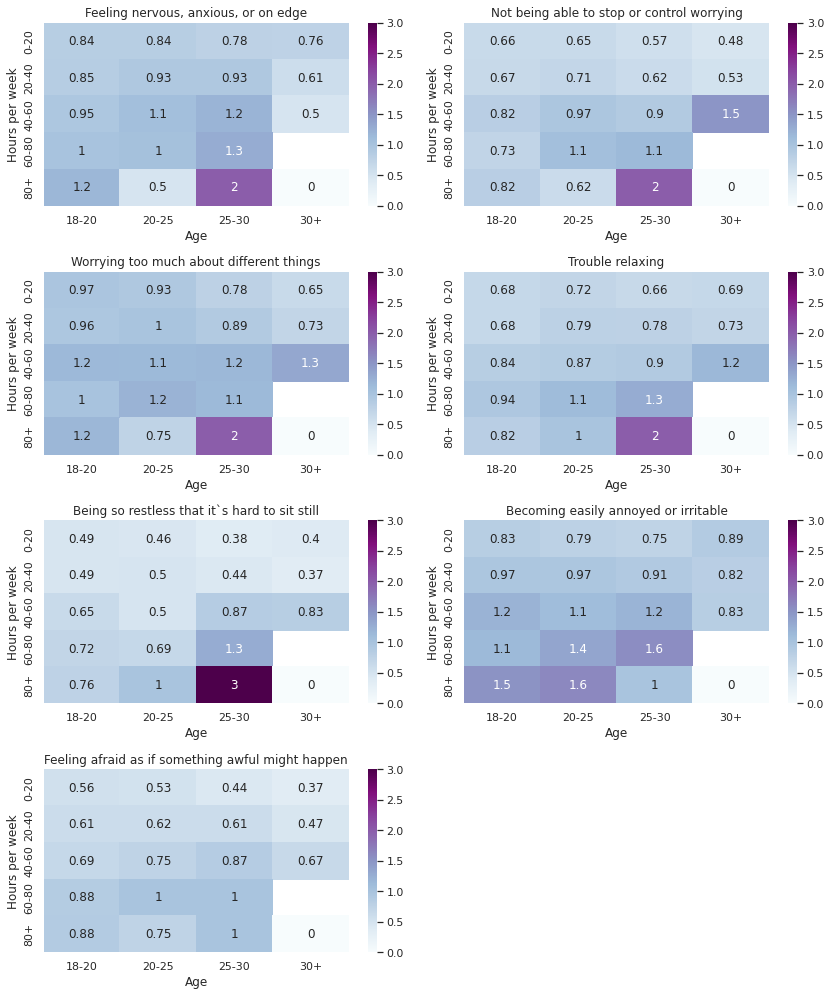

In [ ]:
plt.figure(figsize=(12,14))

for i, stmt in enumerate(statements, start=1):
    plot_heatmap_for_statement(df=legit_hours_copy, current_stmt=stmt, col='GAD'+str(i), min_val=0, max_val=3, subplot_rows=4, subplot_lines=2, subplot_index=i)
plt.tight_layout()

# plt.figure(figsize=(10, 7),dpi=60)

# plt.savefig("hours_plot.png")

#### For almost every statement (problem) and age-group there seems to be a pattern of the more participants play, the more often they have these problems. With the exception being the group, who plays more than 80 hours per week. These seem to be less affected by the problems than the 60-80 hours per week group. The age group of 25-30 seem to be most affected by the above problems when playing more than 80 hours per week.

### Affects of these problems on daily live

The participants were asked "...how difficult have these made it for you to do your work, take care of things at home, or get along with other people?"

They had the following choice of answers:
<ul>
    <li>0 - Not difficult at all</li>
    <li>1 - Somewhat difficult</li>
    <li>2 - Very difficult</li>
    <li>4 - Extremely difficult</li>
</ul>
note: the integers before the answers are my representation of them in the dataframe, used for calculating the mean.

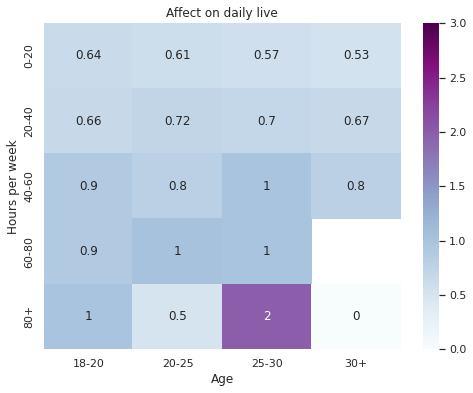

In [ ]:
affection_dict = {
    'Not difficult at all': 0,
    'Somewhat difficult': 1,
    'Very difficult': 2,
    'Extremely difficult': 3,
}

#translate GADE labels to numeric representation for mean calculation
legit_hours_copy['GADE_numeric'] = legit_hours_copy['GADE'].map(affection_dict)

plt.figure(figsize=(8,6))
plot_heatmap_for_statement(df=legit_hours_copy, current_stmt='Affect on daily live', col='GADE_numeric', min_val=0, max_val=3)

#### A similar pattern as above can be seen, where people who play more, tend to have bigger affects of the above problems in their lifes.

## 2. Questionnaire B

The participants had to rank themselfes on the following 5 statements:
<ul>
    <li>1. In most ways my life is close to ideal</li>
    <li>2. The conditions of my life are excellent</li>
    <li>3. I am satisfied with life</li>
    <li>4. So far I have gotten the important things I want in life</li>
    <li>5. If I could live my life over, I would change almost nothing</li>
</ul>

Each Statement could be ranked with the following:
<ul>
    <li>1 - Strongly Disagree</li>
    <li>2 - Disagree</li>
    <li>3 - Slightly Disagree</li>
    <li>4 - Neither Agree or Disagree</li>
    <li>5 - Slightly Agree</li>
    <li>6 - Agree</li>
    <li>7 - Strongly Agree</li>
</ul>

Plotting a matrix of heatmaps like above:

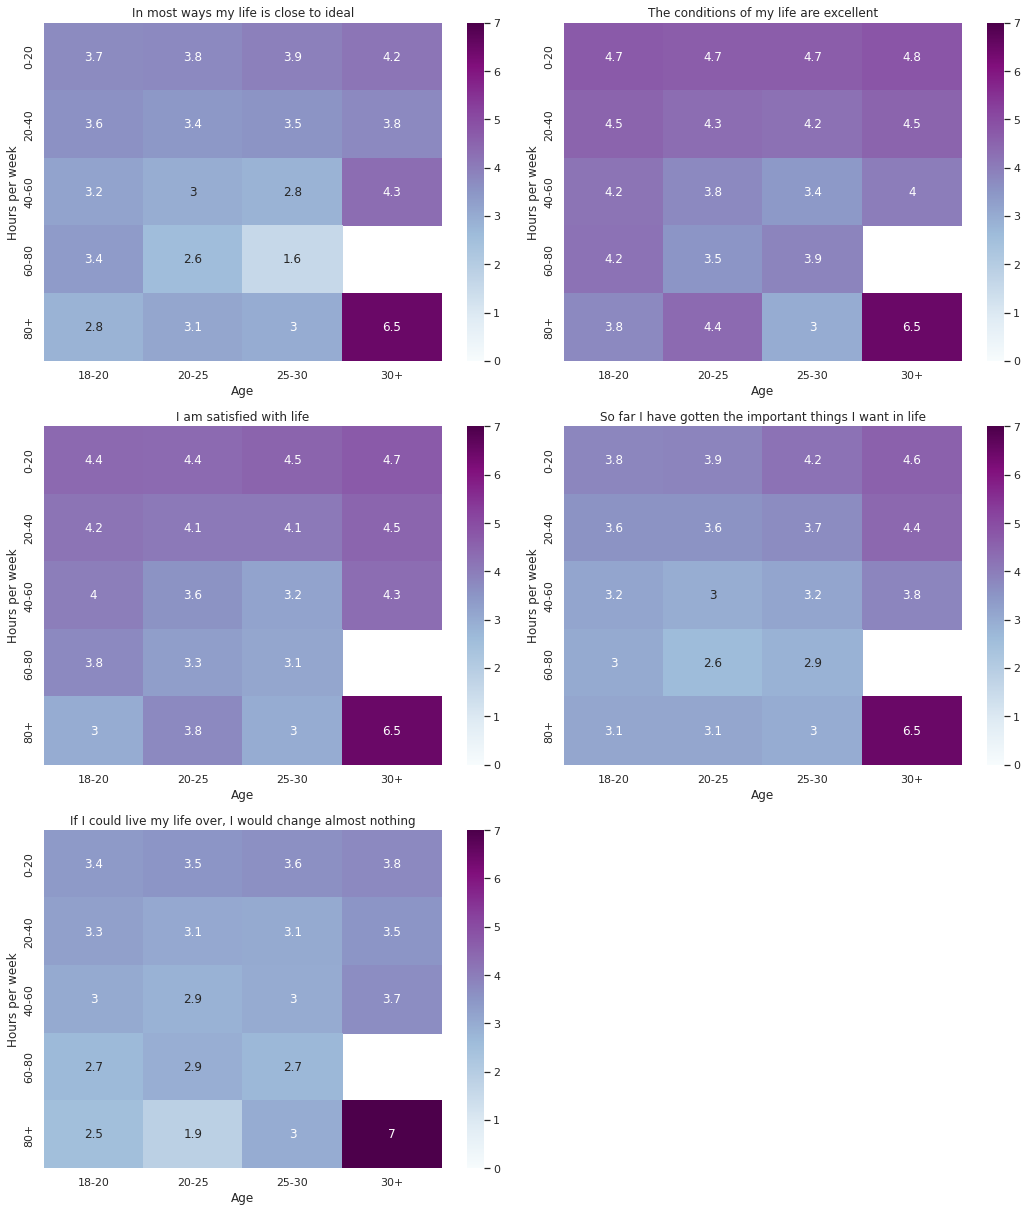

In [ ]:
swl_statements = ['In most ways my life is close to ideal', 'The conditions of my life are excellent', 'I am satisfied with life',
                 'So far I have gotten the important things I want in life', 'If I could live my life over, I would change almost nothing']

plt.figure(figsize=(15,17))

for i, stmt in enumerate(swl_statements, start=1):
    plot_heatmap_for_statement(df=legit_hours_copy, current_stmt=stmt, col='SWL'+str(i), min_val=0, max_val=7, subplot_rows=3, subplot_lines=2, subplot_index=i)
plt.tight_layout()

How Hours played affect the SWL-Scores:

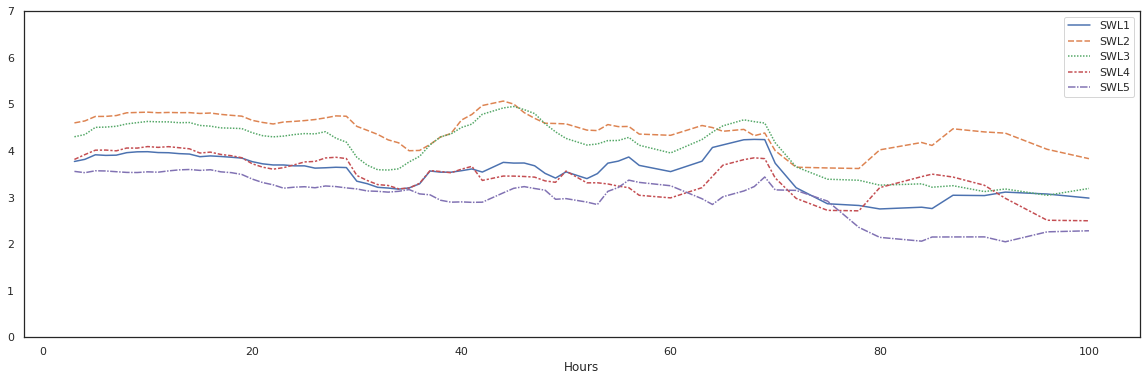

In [ ]:
swl_by_hours = pd.pivot_table(legit_hours_copy, index='Hours', values=['SWL'+str(i) for i in range(1, 6)])

plt.figure(figsize=(20,6))

sns.lineplot(data=swl_by_hours.rolling(7, win_type='gaussian', center=True).mean(std=3))

plt.ylim(0, 7)
plt.show()

### Lets look at the 2nd statement 'The conditions of my life are excellent' a bit closer and check if there is any correlation to the education:

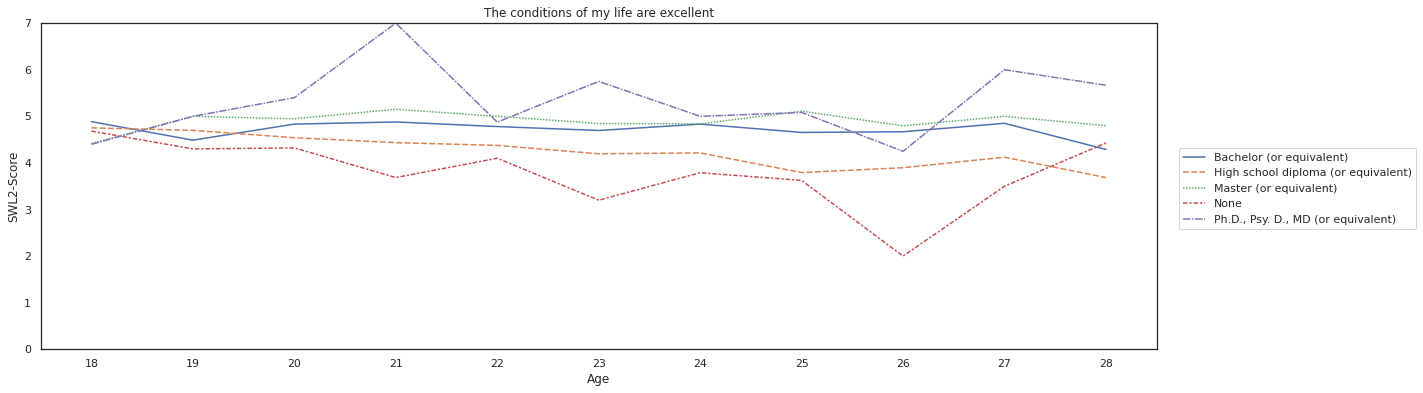

In [ ]:
swl_by_age_with_degree = pd.pivot_table(legit_hours_copy.query('Age <= @upper_whisker'), index='Age', columns='Degree', values='SWL2')
plt.figure(figsize=(20,6))
sns.lineplot(data=swl_by_age_with_degree)
plt.legend(bbox_to_anchor=(1.01, 0.65), loc='upper left', borderaxespad=1)
plt.ylim(0, 7)
plt.xticks(swl_by_age_with_degree.index)
plt.xlabel('Age')
plt.ylabel('SWL2-Score')
plt.title(swl_statements[1])
plt.show()

> Gaming hours & Age  vs GADE

In [ ]:
def plot_heatmap_for_statement_custom(df, v1, v2, current_stmt, col, min_val, max_val, subplot_rows=-1, subplot_lines=-1, subplot_index=-1):
    # build pivot table with col as value
    result_df = pd.pivot_table(df, values=col, index=v1, columns=v2, aggfunc=np.mean)
    
    if subplot_index != -1:
        plt.subplot(subplot_rows, subplot_lines, subplot_index)
        
    plt.title(current_stmt)
    sns.heatmap(data=result_df, annot=True, vmin=min_val, vmax=max_val,cmap="BuPu")
    plt.ylabel(v1)
    plt.xlabel(v2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

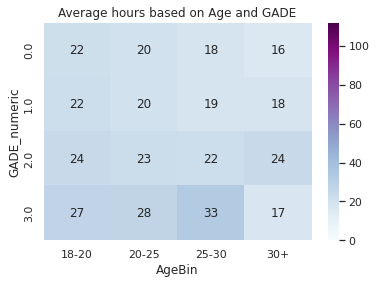

In [ ]:
##112
max_hours_week = 16*7
normal_gamers = orig_data.copy()
##
normal_gamers = normal_gamers.query('Hours <= @max_hours_week')

# creating bins for age
age_bins = [18, 20, 25, 30, 100]
age_labels = ['18-20', '20-25', '25-30', '30+']
normal_gamers['AgeBin'] = pd.cut(normal_gamers.Age, age_bins, labels=age_labels)
hour_bins = [0, 10, 20, 30, 40, 50, 60, 120]
hour_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
normal_gamers['HoursBin'] = pd.cut(normal_gamers.Hours, hour_bins, labels=hour_labels)

affection_dict = {
    'Not difficult at all': 0,
    'Somewhat difficult': 1,
    'Very difficult': 2,
    'Extremely difficult': 3,
}

#translate GADE labels to numeric representation for mean calculation
normal_gamers['GADE_numeric'] = normal_gamers['GADE'].map(affection_dict)

plot_heatmap_for_statement_custom(df=normal_gamers, v1='GADE_numeric', v2='AgeBin', current_stmt='Average hours based on Age and GADE', col='Hours', min_val=0, max_val=112)

## Age group wise GAD VS Hours

In [ ]:
temp = normal_gamers[['GADE_numeric', 'Hours','AgeBin']]

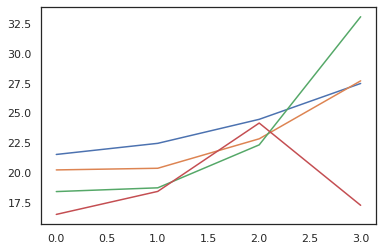

In [ ]:
age_bins = ['18-20','20-25','25-30','30+']
gade_numeric = [0,1,2,3]
for age in age_bins:
  val = []
  age_filt = temp[temp['AgeBin']==age]
  for gad in gade_numeric:
    filt = age_filt[age_filt['GADE_numeric']==gad]
    mn = filt['Hours'].mean()
    val.append(mn)
  plt.plot(gade_numeric, val, label = age)
plt.show()

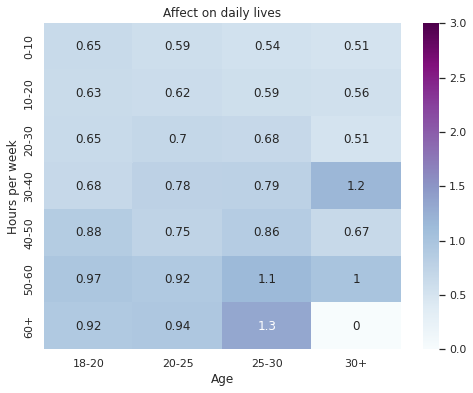

In [ ]:
plt.figure(figsize=(8,6))
plot_heatmap_for_statement(df=normal_gamers, current_stmt='Affect on daily lives', col='GADE_numeric', min_val=0, max_val=3)

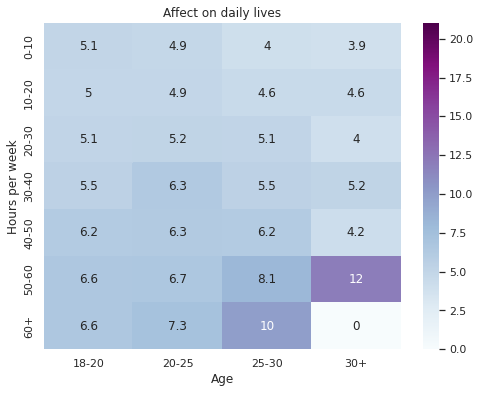

In [ ]:
plt.figure(figsize=(8,6))
plot_heatmap_for_statement(df=normal_gamers, current_stmt='Affect on daily lives', col='GAD_T', min_val=0, max_val=21)

<h1> Analysis </h1>

In [ ]:
df = orig_data.copy()

In [ ]:
import re
#Playstyle
df_playstyle = df.Playstyle.copy()
pat_fr = re.compile(".*friends?.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_fr, value='Multiplayer-Friends', regex=True)
pat_fr = re.compile(".*same room.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_fr, value='Multiplayer-Friends', regex=True)
pat_aq = re.compile(".*multiplayer.*acquaintances?.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_aq, value='Multiplayer-Acquaintances', regex=True)
pat_st = re.compile(".*multiplayer.*strangers?.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_st, value='Multiplayer-Strangers', regex=True)
pat_sp = re.compile(".*single.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_sp, value='SinglePlayer', regex=True)
pat_sp = re.compile(".*solo.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_sp, value='SinglePlayer', regex=True)
pat_al = re.compile(".*all.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_al, value='All', regex=True)
pat_rest = re.compile(".*stranger.*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_rest, value='Multiplayer-Strangers', regex=True)
pat_rest = re.compile(".*multiplayer .*",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_rest, value='Multiplayer-Strangers', regex=True)
pat_rem = re.compile("^Mu",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_sp, value='SinglePlayer', regex=True)
pat_re = re.compile("^(?!(Multiplayer-Friends)|(Multiplayer-Acquaintances)|(Multiplayer-Strangers)|(SinglePlayer)|(All)).*$",re.I)
df_playstyle = df_playstyle.replace(to_replace=pat_re, value='Others_playstyle', regex=True)

In [ ]:
#Whyplay
df_whyplay = df.whyplay.copy()
pat1 = re.compile(".*win.*",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='win', regex=True)
pat1 = re.compile(".*fun.*",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='fun', regex=True)
pat1 = re.compile(".*improv.*",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='improve', regex=True)
pat1 = re.compile(".*relax.*",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='relax', regex=True)
pat1 = re.compile(".*friends.*",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='relax', regex=True)
pat1 = re.compile(".*time.*",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='relax', regex=True)
pat1 = re.compile("^(?!(win)|(fun)|(improve)|(relax)).*$",re.I)
df_whyplay = df_whyplay.replace(to_replace=pat1, value='others_whyplay', regex=True)

In [ ]:
df_earnings = df.earnings.copy();
pat1 = re.compile(".*earn a little.*",re.I)
df_earnings = df_earnings.replace(to_replace=pat1, value='earn_little', regex=True)
pat1 = re.compile(".*fun.*",re.I)
df_earnings = df_earnings.replace(to_replace=pat1, value='no_earning', regex=True)
pat1 = re.compile(".*win.*",re.I)
df_earnings = df_earnings.replace(to_replace=pat1, value='no_earning', regex=True)
pat1 = re.compile(".*competitive.*",re.I)
df_earnings = df_earnings.replace(to_replace=pat1, value='earn_living', regex=True)
pat1 = re.compile(".*develop so.*",re.I)
df_earnings = df_earnings.replace(to_replace=pat1, value='earn_living', regex=True)
pat1 = re.compile(".*earn a living.*",re.I)
df_earnings = df_earnings.replace(to_replace=pat1, value='earn_living', regex=True)
pat_re = re.compile("^(?!(earn_little)|(no_earning)|(earn_living)).*$",re.I)
df_earnings = df_earnings.replace(to_replace=pat_re, value='no_earning', regex=True)

In [ ]:
df['whyplay'] = df_whyplay
df['Playstyle'] = df_playstyle
df['earnings'] = df_earnings

In [ ]:
d = {'earn_little': 1, 'no_earning': 0, 'earn_living': 2}
df['earningsNum'] = df['earnings'].apply(lambda x: next((v for k, v in d.items() if x == k), 0))

In [ ]:
d = {range(0, 5): 0, range(5, 10): 1, range(10, 15): 2, range(15,22): 3}
df['groupedGAD'] = df['GAD_T'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))

In [ ]:
# creating bins for age
df = df[df.Hours <= 112]

age_bins = [18, 20, 25, 30, 100]
age_labels = ['18-20', '20-25', '25-30', '30+']
df['AgeBin'] = pd.cut(df.Age, age_bins, labels=age_labels)
hour_bins = [0, 10, 20, 30, 40, 50, 60, 120]
hour_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
df['HoursBin'] = pd.cut(df.Hours, hour_bins, labels=hour_labels)

affection_dict = {
    'Not difficult at all': 0,
    'Somewhat difficult': 1,
    'Very difficult': 2,
    'Extremely difficult': 3,
}

#translate GADE labels to numeric representation for mean calculation
df['GADE_numeric'] = df['GADE'].map(affection_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

## How does earnings from play and Age group affect GAD?

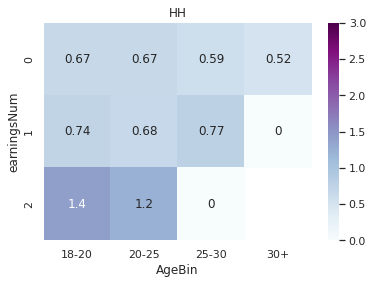

In [ ]:
plot_heatmap_for_statement_custom(df=df, v1='earningsNum', v2='AgeBin', current_stmt='HH', col='groupedGAD', min_val=0, max_val=3)

Text(0, 0.5, 'Average GAD')

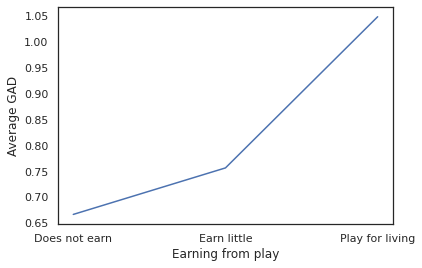

In [ ]:
earnings = [0,1,2]
val = []
for i in earnings: 
  temp = df[df['earningsNum']==i] 
  val.append(temp['groupedGAD'].mean())
plt.plot(['Does not earn','Earn little','Play for living'],val)
plt.xlabel('Earning from play')
plt.ylabel('Average GAD')

More the earnings from play, higher is the GAD

##How does purpose of playing affect GAD?

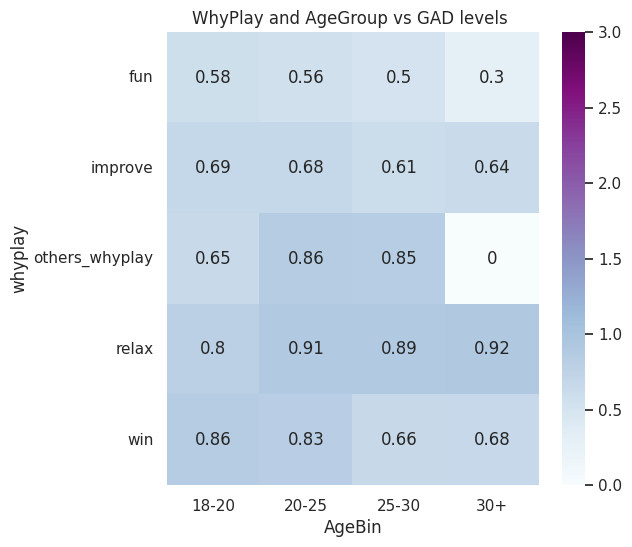

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
plot_heatmap_for_statement_custom(df=df, v1='whyplay', v2='AgeBin', current_stmt='WhyPlay and AgeGroup vs GAD levels ', col='groupedGAD', min_val=0, max_val=3)

##How do the people playing along affect GAD?

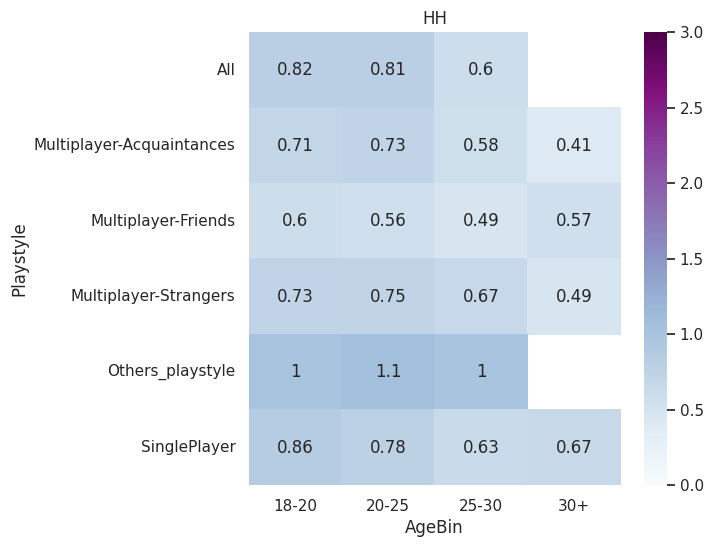

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
plot_heatmap_for_statement_custom(df=df, v1='Playstyle', v2='AgeBin', current_stmt='HH', col='groupedGAD', min_val=0, max_val=3)